In [1]:
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as ipw

from lib.dataset_wrapper import Dataset
from lib.nn.jerk_loss import compute_jerk_loss
from lib.notebooks import show_ema

In [2]:
def compute_jerk(art):
    speed = np.diff(art, axis=0)
    acc = np.diff(speed, axis=0)
    jerk = np.diff(acc, axis=0)
    return jerk ** 2

In [3]:
DATASETS_NAME = ["pb2007", "fsew0", "msak0"]
ART_TYPE = "ema"
ART_PARAMS = ["JH", "TB", "TD", "TT", "LP", "LH", "VL"]

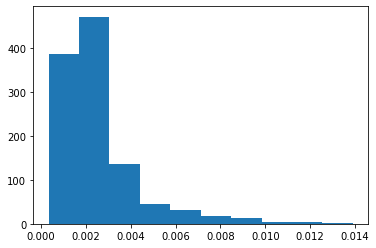

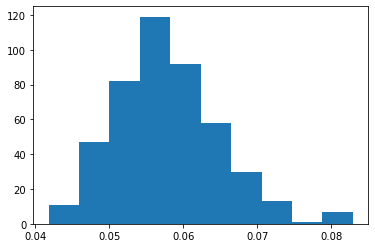

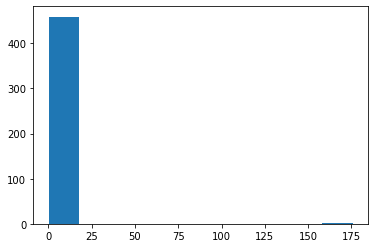

In [8]:
for dataset_name in DATASETS_NAME:
    dataset = Dataset(dataset_name)
    items_art = dataset.get_items_data(ART_TYPE, cut_silences=True)
    
    items_jerk = []
    
    for item_art in items_art.values():
        item_jerk = compute_jerk(item_art)
        items_jerk.append(item_jerk)
    all_jerk = np.concatenate(items_jerk, axis=0)
    jerk_per_item = [item_jerk.mean() for item_jerk in items_jerk]
    
    plt.figure()
    plt.hist(jerk_per_item)
    plt.show()
    continue
    
    mean_jerk = all_jerk.mean()
    params_jerk = all_jerk.mean(axis=0)
    nb_params = len(params_jerk)
    xticks = np.arange(1 + nb_params)
    xticklabels = ["Global"] + ART_PARAMS[:nb_params]
    
    plt.figure()
    ax = plt.subplot()
    ax.set_title(dataset_name)
    # ax.set_xticks(xticks, xticklabels)
    ax.bar(0, mean_jerk)
    ax.bar(xticks[1:], params_jerk)
    plt.show()

In [6]:
def show_dataset(dataset_name):
    dataset = Dataset(dataset_name)
    items_ema = dataset.get_items_data(ART_TYPE, cut_silences=True)
    items_name = dataset.get_items_list()

    def resynth_item(item_name):
        item_ema = items_ema[item_name]
        
        if ART_TYPE == "art_params":
            estimated_art = dataset.art_to_ema(estimated_art)
        item_ema = items_ema[item_name]
        show_ema(item_ema, is_artis=dataset_name == "pb2007")

    display(ipw.interactive(resynth_item, item_name=items_name))

display(ipw.interactive(show_dataset, dataset_name=DATASETS_NAME))

interactive(children=(Dropdown(description='dataset_name', options=('pb2007', 'fsew0', 'msak0'), value='pb2007…